In [118]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

#see files in kaggle directory
#listfiles=os.listdir("../input")
#print(listfiles)

In [119]:
# We will be previewing images alongthe way, so lets create a function
def previewImg(text,img_preview,grayscale=False):
    #plt.imshow(img_preview)
    if grayscale==False:
        #convert a color image from BGR to RGB before previewing
        plt.imshow(cv2.cvtColor(img_preview, cv2.COLOR_BGR2RGB))
    else:
        #option for Grayscale images
        plt.imshow(cv2.cvtColor(img_preview, cv2.COLOR_GRAY2RGB))
    plt.title(text)
    plt.show()

In [120]:
#load the example.  It is a white piece, the most difficult to detect!
img_example=cv2.imread('image7/11.jpg')

#load a background, so we can extract it and make it easy to detect the object.
img_bg=cv2.imread('image7/10.jpg')

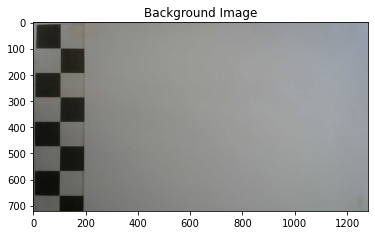

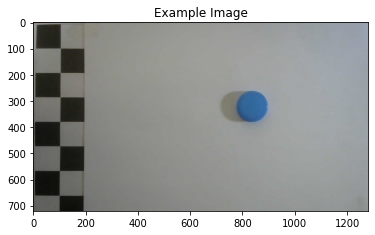

In [121]:
# our starting Point
previewImg('Background Image',img_bg)
previewImg('Example Image',img_example)

In [122]:
img_example

array([[[ 41,  51,  68],
        [ 42,  52,  69],
        [ 44,  54,  71],
        ...,
        [173, 163, 153],
        [173, 163, 153],
        [173, 163, 153]],

       [[ 58,  68,  85],
        [ 59,  69,  86],
        [ 61,  71,  88],
        ...,
        [173, 163, 153],
        [173, 163, 153],
        [173, 163, 153]],

       [[ 64,  73,  87],
        [ 65,  74,  88],
        [ 66,  75,  89],
        ...,
        [173, 163, 153],
        [173, 163, 153],
        [173, 163, 153]],

       ...,

       [[ 98,  98,  98],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [150, 151, 147],
        [151, 152, 148],
        [151, 152, 148]],

       [[ 98,  98,  98],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [151, 152, 148],
        [151, 152, 148],
        [152, 153, 149]],

       [[ 98,  98,  98],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [151, 152, 148],
        [152, 153, 149],
        [152, 153, 149]]

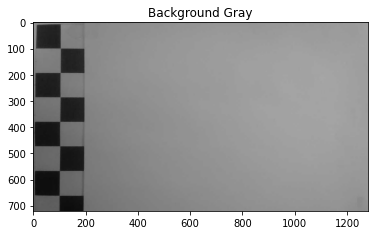

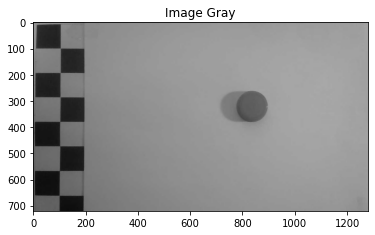

In [123]:
# Background - Gray
img_bg_gray=cv2.cvtColor(img_bg, cv2.COLOR_BGR2GRAY)
previewImg("Background Gray",img_bg_gray,True)
# Image - Gray
img_gray=cv2.cvtColor(img_example, cv2.COLOR_BGR2GRAY)
previewImg("Image Gray",img_gray,True)

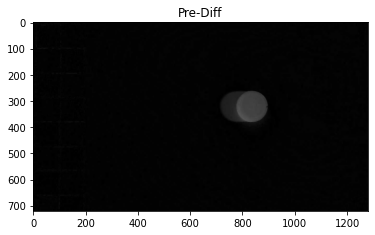

In [124]:
# Calculate Difference
diff_gray=cv2.absdiff(img_bg_gray,img_gray)
previewImg("Pre-Diff",diff_gray,True)

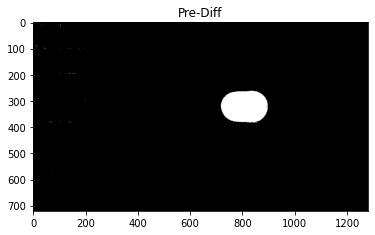

In [125]:
im_bw = cv2.threshold(diff_gray, 20, 255, cv2.THRESH_BINARY)[1]
previewImg("Pre-Diff",im_bw,True)

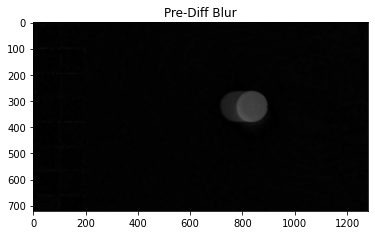

In [126]:
# Diff Blur
diff_gray_blur = cv2.GaussianBlur(diff_gray,(5,5),0)
previewImg("Pre-Diff Blur",diff_gray_blur,True)

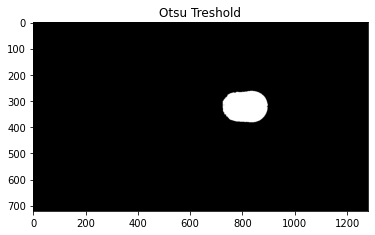

True

In [127]:
# find otsu's threshold value with OpenCV function
ret, img_tresh = cv2.threshold(diff_gray_blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
previewImg("Otsu Treshold",img_tresh,True)
cv2.imwrite("image7/otsu.jpg", img_tresh)

In [128]:
t = cv2.cvtColor(img_tresh,cv2.COLOR_GRAY2RGB)
t = cv2.cvtColor(img_tresh,cv2.COLOR_RGB2BGR)

In [129]:
t = t*img_example

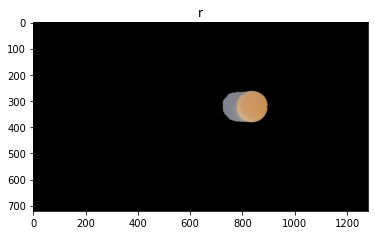

In [130]:

previewImg('r',t ) 

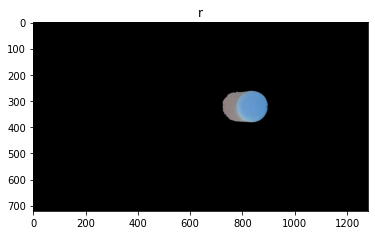

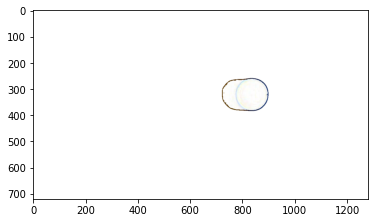

In [131]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = t.copy()
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite('image7/remove_back.jpg', img)
previewImg('r', img)
rgb_planes = cv2.split(img)


result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)
    
result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)

# cv2.imwrite('shadows_out.png', result)
# cv2.imwrite('shadows_out_norm.png', result_norm)
plt.imshow(result_norm)

plt.show()